<a href="https://colab.research.google.com/github/Thayer-ENGS108/assignment_1_fall2022-schenkelbergf/blob/main/Assignment_1_Fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENGS 108 Fall 2022 Assignment 1
### Due September 15, 2022 at 11:59PM on Canvas
### Instructors: George Cybenko
### TAs: Chase Yakaboski and Clement Nyanhongo

In [1]:
#TODO: Put any import statements in this code block.
# Imports
import matplotlib.pyplot
import numpy
import tensorflow
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

## Question 1
Go to
https://www.kaggle.com/datasets/coloradokb/dandelionimages and download the dandelion and other images.

In [2]:
#TODO: Put your code to download the dandelion images in this code block.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Image Paths from Mounted Drive
train_path = '/content/drive/MyDrive/Images/train'
valid_path = '/content/drive/MyDrive/Images/valid'
test_path = '/content/drive/MyDrive/Images/test'

In [4]:
# Number of Samples to Work Through: 10.
train_batches = ImageDataGenerator(preprocessing_function=tensorflow.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=["dandelion","other"],batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tensorflow.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=["dandelion","other"],batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tensorflow.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=["dandelion","other"],batch_size=10,shuffle=False)

Found 900 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


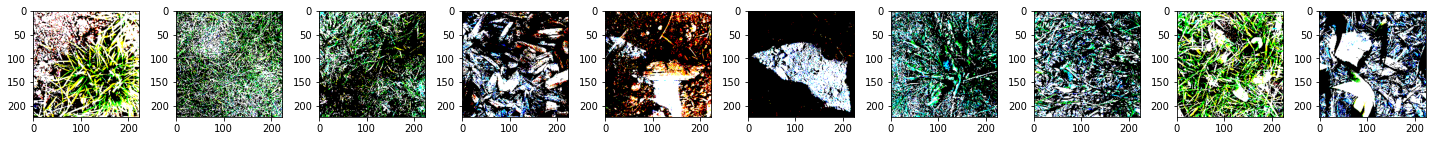

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [5]:
# Plot Images
# Reference: https://www.tensorflow.org/tutorials/images/classification
images, labels = next(train_batches)

def plotImages(images):
    figure, axes = matplotlib.pyplot.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for image, axes_image in zip(images, axes):
        axes_image.imshow(image)
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

plotImages(images)
print(labels)

In [6]:
# Sequential model
# Reference: https://keras.io/guides/sequential_model/

model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same",input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2,activation="softmax")
])

In [7]:
# Training The Neural Network
model.summary()
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

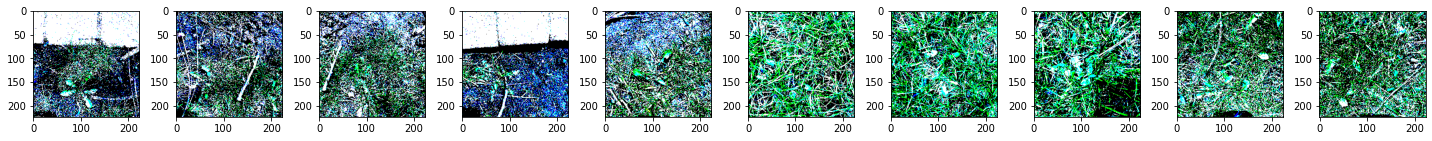

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [8]:
# Plot Images
test_images, test_labels = next(test_batches)

plotImages(test_images) # plotImages Definded: Line 25
print(test_labels)

(a) Define a reasonable distance metric between images and explain it with an example.

*TODO: Explain your distance metric with text, equations or both.*

In my opinion, the best way to deal with this dataset is by image classification. Another way to deal with this dataset is by shape detection (OpenCV). However, in this assignment, I utilized TensorFlow to build and train a model to classifiy images as 'dandelion' or 'other.' In the following blocks of code, I am able to make a prediction based on my saved model. While you can run the script above to see how my model was trained. Please be advised that this process takes 45-60 minutes. Which is why I saved a version of this model to my google drive. While there is some definite overfitting; This basic model is adiquate for the assignment. I believe that it will much better at finding dandelions in photos when they have yet to bloom - no yellow pixels. As well as fining dandelions in photos when they are missing their capitulum - again, no yellow pixels. If you have any questions, please do not hesitate to reach out!

In [10]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/saved_model/my_model')

In [11]:
#TODO: Test your distance metric on two example images from the dandelions dataset.
# Step 1: Import Saved Model
new_model = tensorflow.keras.models.load_model('/content/drive/MyDrive/saved_model/my_model')
new_model.summary()

# Evaluateing the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [14]:
# Step 2: Test my model on two (I did 100) example images from the dandelions dataset.
predictions = new_model.predict(x=test_batches, verbose=0)
print(predictions)

[[1.00000000e+00 6.52168319e-17]
 [6.95142720e-04 9.99304891e-01]
 [1.00000000e+00 1.81728486e-11]
 [1.00000000e+00 7.13025194e-10]
 [1.00000000e+00 9.44907139e-11]
 [4.19761892e-03 9.95802343e-01]
 [1.00000000e+00 7.53866067e-11]
 [1.00000000e+00 2.21244304e-16]
 [1.12527363e-01 8.87472630e-01]
 [2.21552832e-10 1.00000000e+00]
 [2.05062202e-06 9.99997973e-01]
 [1.23782831e-10 1.00000000e+00]
 [1.00000000e+00 3.85855187e-23]
 [9.99997973e-01 1.96950577e-06]
 [6.36277742e-09 1.00000000e+00]
 [9.99999762e-01 1.92235333e-07]
 [2.63781520e-04 9.99736249e-01]
 [9.48193908e-01 5.18060550e-02]
 [9.92200792e-01 7.79927429e-03]
 [8.66291642e-01 1.33708328e-01]
 [9.99998808e-01 1.17277295e-06]
 [9.74968314e-01 2.50317231e-02]
 [9.99867797e-01 1.32133413e-04]
 [5.07090380e-03 9.94929075e-01]
 [1.52050525e-11 1.00000000e+00]
 [1.00000000e+00 2.69665887e-12]
 [8.42007867e-04 9.99158025e-01]
 [2.02095048e-14 1.00000000e+00]
 [9.89270806e-01 1.07291378e-02]
 [6.99060321e-01 3.00939649e-01]
 [1.765076

(b) Which two images are most similar according to your metric?

In [16]:
#TODO: Write your code here.
# While you could also build out a confusion matrix here, because my tester set only had 100 photos, it was just as easy to scroll through the results to see which two images were the most similar.
# The two Images from my test images folder, are the two that returned [1.00000000e+00 8.20685750e-13] and [1.00000000e+00 8.79433408e-13] at index[42] and index[91].
# Starting from index[0] and counting over -- that would be images "https://drive.google.com/open?id=1jtAxoskWHTUrxE0ES4WhzPoMFMUm_fth" and "https://drive.google.com/open?id=11fWEW7z6DSsbfqs8HjqO100V0TGdJ1ZE".

(c) Which two images are most different according to your metric?

In [ ]:
#TODO: Write your code here.
# Two Images from my test images folder, that are most different are the two that returned [1.61259998e-38 1.00000000e+00] and  [1.00000000e+00	8.79433408e-13] at index[57] and index[91].
# Again, starting from index[0] and counting over -- that would be images "https://drive.google.com/open?id=1HNnFKR0DMUV_hSEzQ9Enw3YkI7Udn-yY" and "https://drive.google.com/open?id=11fWEW7z6DSsbfqs8HjqO100V0TGdJ1ZE".
# I made sure this test batch would not be shuffeled.

(d) What dandelion image is the most representative of the dandelion images?

In [15]:
#TODO: Write your code here. Hint: Which image is closest to all the dandelion images?
numpy.round(predictions)
# In accordance with my model, everything labeled [1. 0.] is predicted as being a dandelion.
# In my test set, the dandelion image most representative of the dandelion images is the image that returned [1.00000000e+00	8.20685750e-13] at index[42]
# Starting from index[0] and counting over -- that would be image "https://drive.google.com/open?id=1jtAxoskWHTUrxE0ES4WhzPoMFMUm_fth".

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

(e) Which other image is most representative of the other images?

In [ ]:
#TODO: Write your code here.
# In accordance with my model, everything labeled [0. 1.] is predicted as being other.
# In my test set, the image most representative of the other images is the image that returned [1.61259998e-38 1.00000000e+00] at index[57]
# Starting from index[0] and counting over -- that would be image "https://drive.google.com/open?id=1HNnFKR0DMUV_hSEzQ9Enw3YkI7Udn-yY".

(f) What dandelion image and other image are closest to each other?

In [ ]:
#TODO: Write your code here.
# As stated above, two Images from my test images folder, that are very similar are the two that returned [1.00000000e+00 8.20685750e-13] and [1.00000000e+00 8.79433408e-13] at index[42] and index[91].
# One was a dandelion image and other was an other image.
# Starting from index[0] and counting over -- that would be images "https://drive.google.com/open?id=1jtAxoskWHTUrxE0ES4WhzPoMFMUm_fth" and "https://drive.google.com/open?id=11fWEW7z6DSsbfqs8HjqO100V0TGdJ1ZE".

## Question 2
Let 
$$ f(x_1, x_2, x_3, x_4, x_5) = \frac{1}{1 + e^{-2x_1-3x_2-4x_3-5x_4-6x_5}} $$

(a) What is $$\frac{∂f}{∂x_i}$$

#Calculated this derivative by hand: quotient rule


*Answer: ((1+e^(-2x^1-3x^2-4x^3-5x^4-6x^5))(0)-(1)((e^(-2x^1-3x^2-4x^3-5x^4-6x^5))(-2-6x-12x^2-20x^3-30x^4)))/(1+e^(-2x^1-3x^2-4x^3-5x^4-6x^5))^2*


The *sympy* calculation can be found below.

In [ ]:
import sympy

x = sympy.symbols("x", real=True)
function = 1 / (1 + sympy.exp(-2*(x**1)-3*(x**2)-4*(x**3)-5*(x**4)-6*(x**5)))

print(sympy.diff(function,x))

-(-30*x**4 - 20*x**3 - 12*x**2 - 6*x - 2)*exp(-6*x**5 - 5*x**4 - 4*x**3 - 3*x**2 - 2*x)/(exp(-6*x**5 - 5*x**4 - 4*x**3 - 3*x**2 - 2*x) + 1)**2


(b) What is $$\nabla f(1,0,0,0,0)\cdot ones(5,1) $$

In [ ]:
# To solve for this equation, my setps were as follows:
# Take the derivative and solve f(1,0,0,0,0).
# Place each solution in matrix and multiply by a 5 row matrix filled with ones.

from math import exp

x = 1
function_1 = -(-30*x**4 - 20*x**3 - 12*x**2 - 6*x - 2)*exp(-6*x**5 - 5*x**4 - 4*x**3 - 3*x**2 - 2*x)/(exp(-6*x**5 - 5*x**4 - 4*x**3 - 3*x**2 - 2*x) + 1)**2

y = 0
function_2 = -(-30*y**4 - 20*y**3 - 12*y**2 - 6*y - 2)*exp(-6*y**5 - 5*y**4 - 4*y**3 - 3*y**2 - 2*y)/(exp(-6*y**5 - 5*y**4 - 4*y**3 - 3*y**2 - 2*y) + 1)**2

matrix = [[function_1],
          [function_2],
          [function_2],
          [function_2],
          [function_2]]

matrix * numpy.ones((5,1))

array([[1.44280753e-07],
       [5.00000000e-01],
       [5.00000000e-01],
       [5.00000000e-01],
       [5.00000000e-01]])

*Answer*

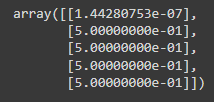

*TODO: Write your answers in Markdown/Latex in this code block.*

(b) What is $$\nabla f(0,1,0,0,0)\cdot ones(5,1) $$

In [ ]:
# To solve for this equation, my setps were as follows:
# Take the derivative and solve f(0,1,0,0,0).
# Place each solution in matrix and multiply by a 5 row matrix filled with ones.

from math import exp

x = 1
function_1 = -(-30*x**4 - 20*x**3 - 12*x**2 - 6*x - 2)*exp(-6*x**5 - 5*x**4 - 4*x**3 - 3*x**2 - 2*x)/(exp(-6*x**5 - 5*x**4 - 4*x**3 - 3*x**2 - 2*x) + 1)**2

y = 0
function_2 = -(-30*y**4 - 20*y**3 - 12*y**2 - 6*y - 2)*exp(-6*y**5 - 5*y**4 - 4*y**3 - 3*y**2 - 2*y)/(exp(-6*y**5 - 5*y**4 - 4*y**3 - 3*y**2 - 2*y) + 1)**2

matrix = [[function_2],
          [function_1],
          [function_2],
          [function_2],
          [function_2]]

matrix * numpy.ones((5,1))

array([[5.00000000e-01],
       [1.44280753e-07],
       [5.00000000e-01],
       [5.00000000e-01],
       [5.00000000e-01]])

*Answer:*

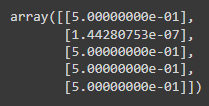

*TODO: Write your answers in Markdown/Latex in this code block.*

## Question 3
Some Tesla batteries have an amp hour rating of 230 but in tests, it has been determined that the actual amp hours of a new battery is a random variable uniformly distributed between 230 and 250 amp hours. (Tesla is conservative in reporting this.)

(a) Tesla service center is shipped 5 randomly selected batteries. What is the probability that exactly 2 of the 5 batteries have less than 235 amp hours?

In [ ]:
#TODO: Write your answers in Markdown/Latex or code.

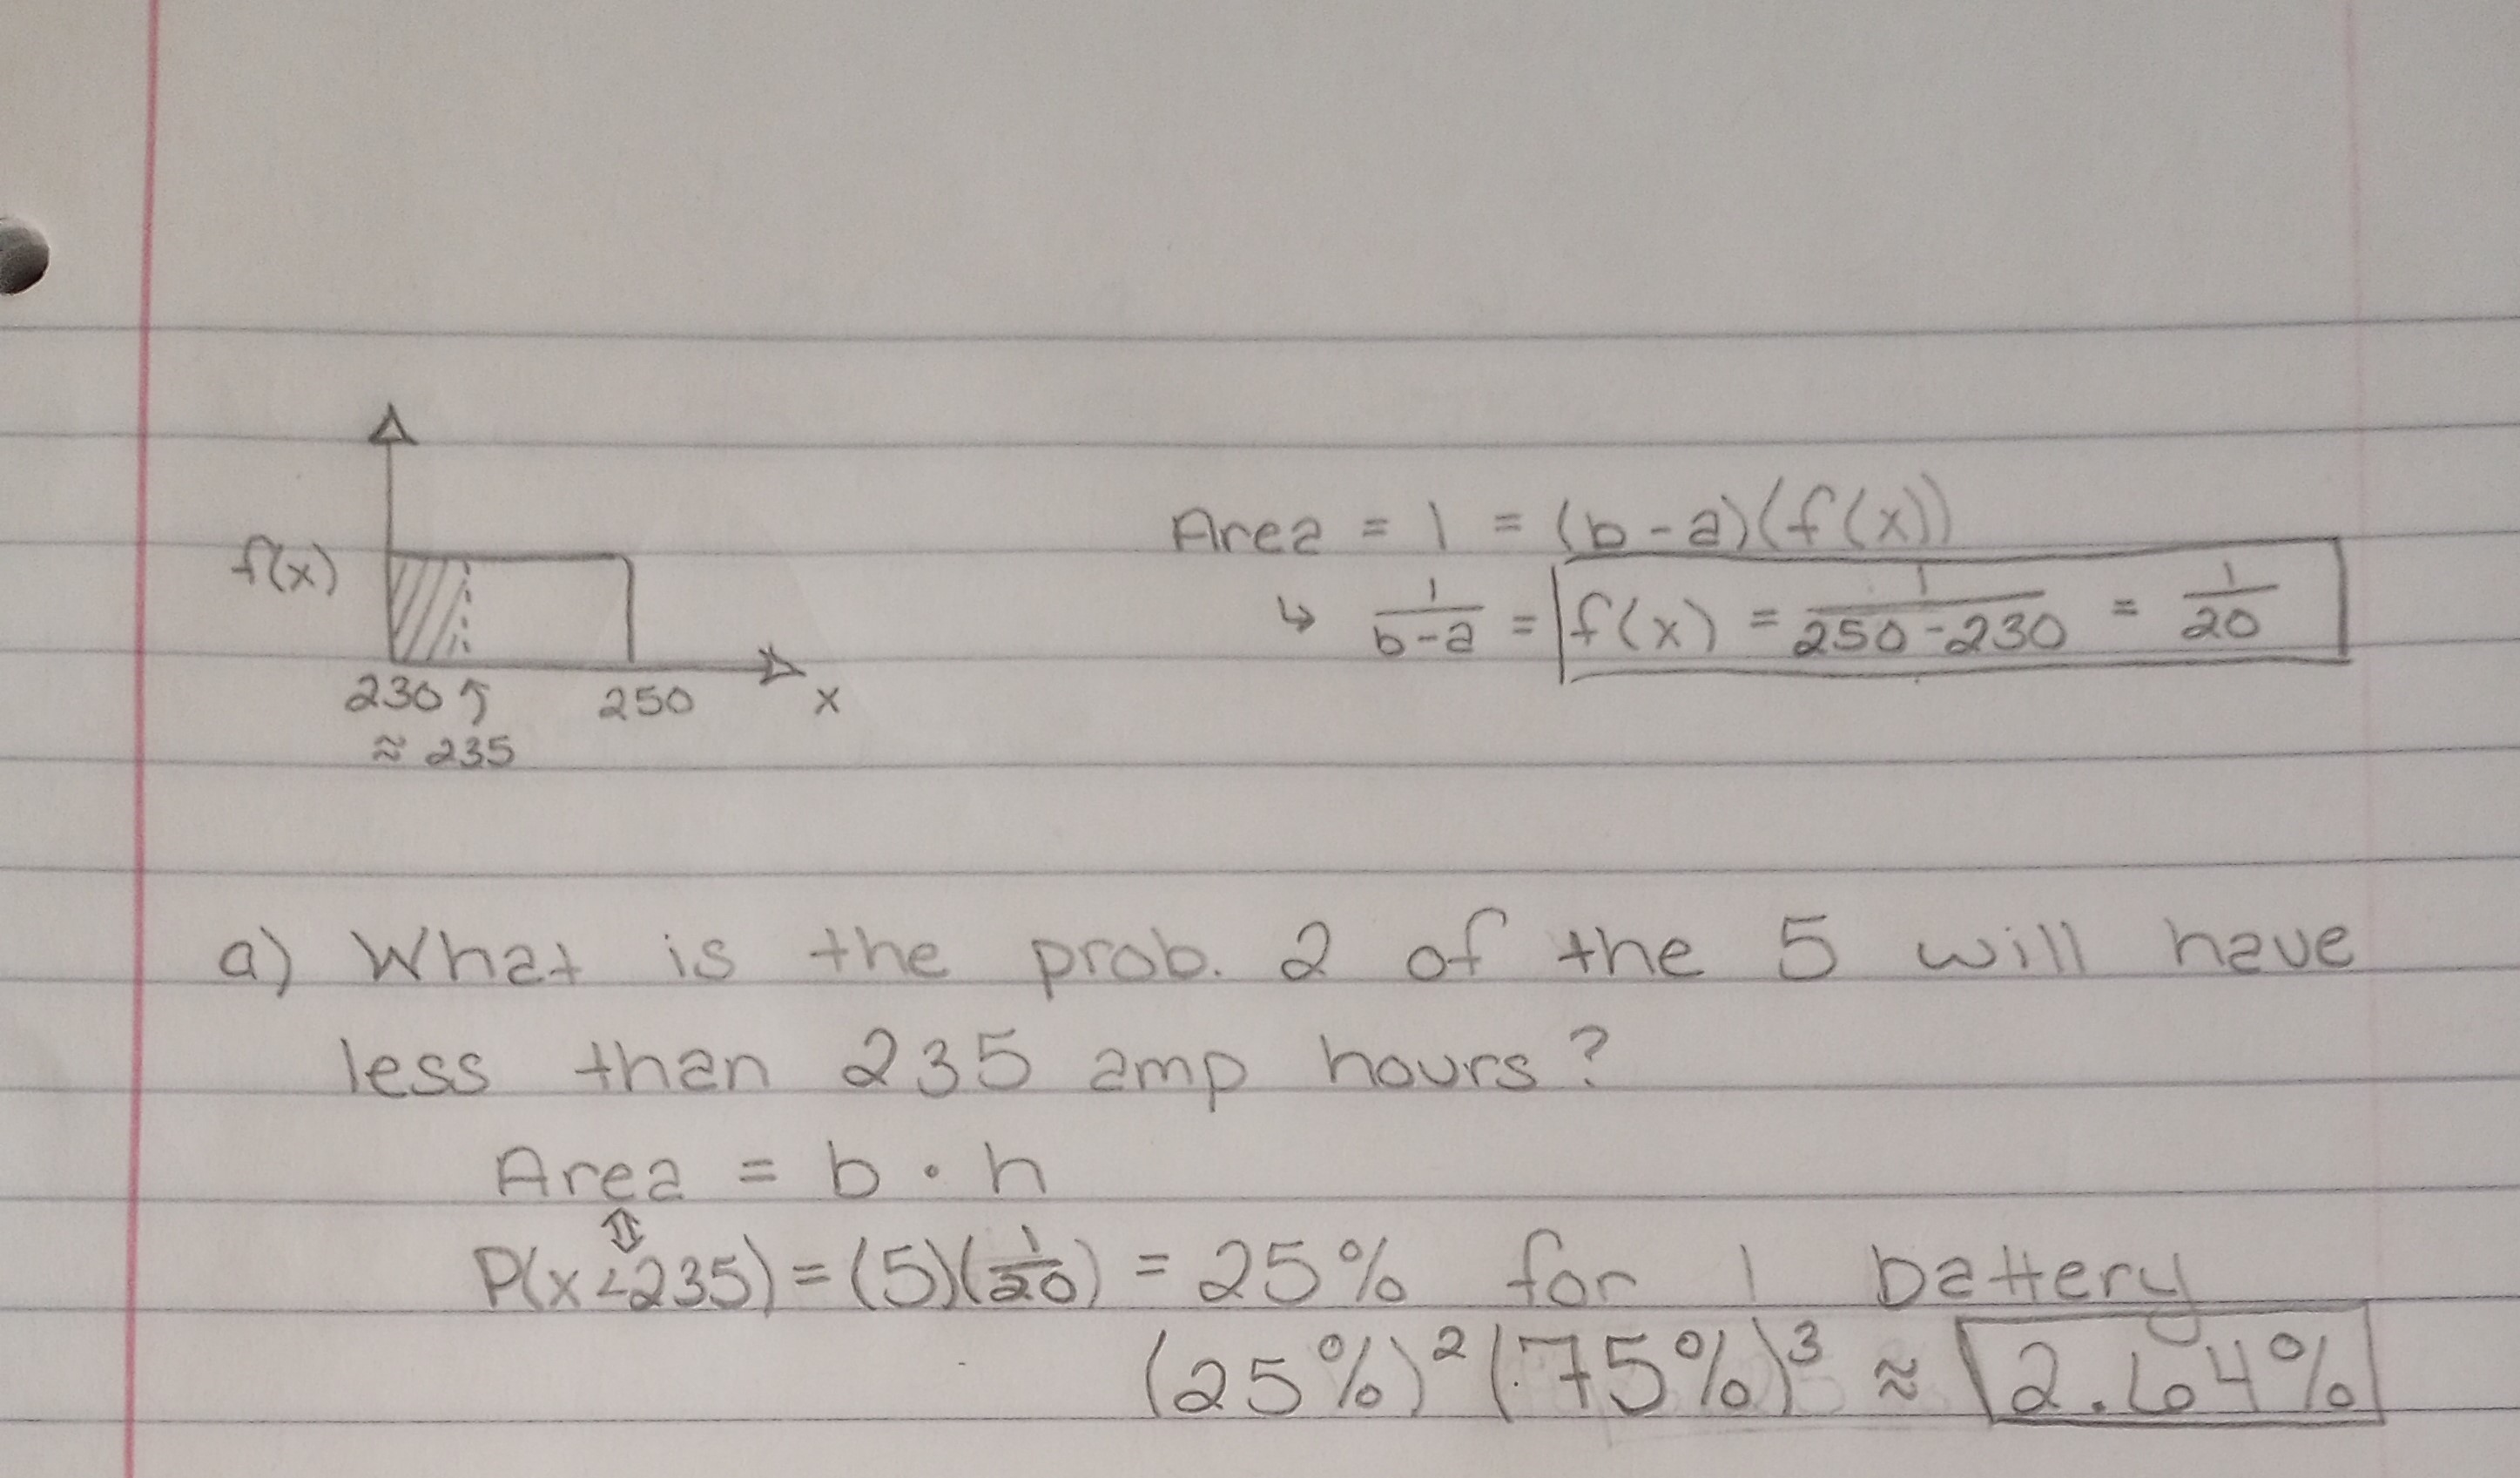

(b) Your Tesla battery is being replaced at that service center. The service center does not measure the amp hours of batteries it receives or installs. What is the probability that the smallest amp hours of the 5 batteries is below 235?

In [ ]:
#TODO: Write your answers in Markdown/Latex or code.

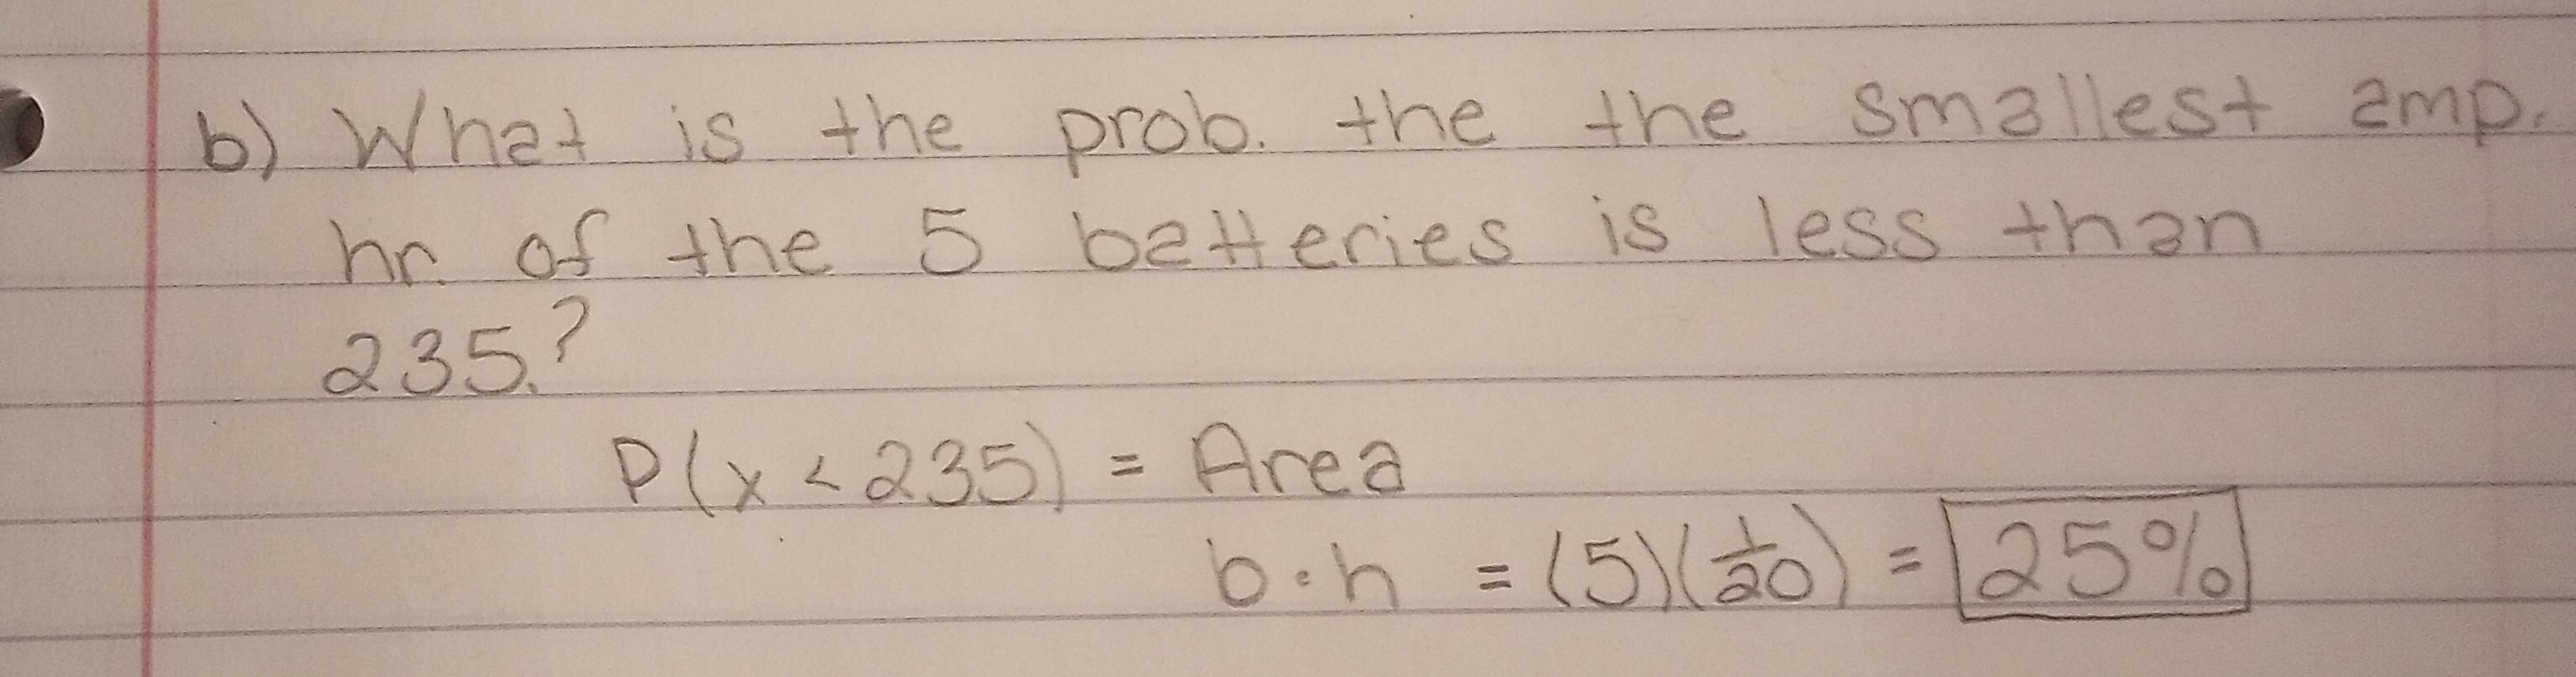

(c) What is the probability that your Tesla gets the battery with the lowest amp hours?

In [ ]:
#TODO: Write your answers in Markdown/Latex or code.
# The area of a Continuous Uniform Distribution (Rectangle) of base (0) * height (1/20) is equal to zero.

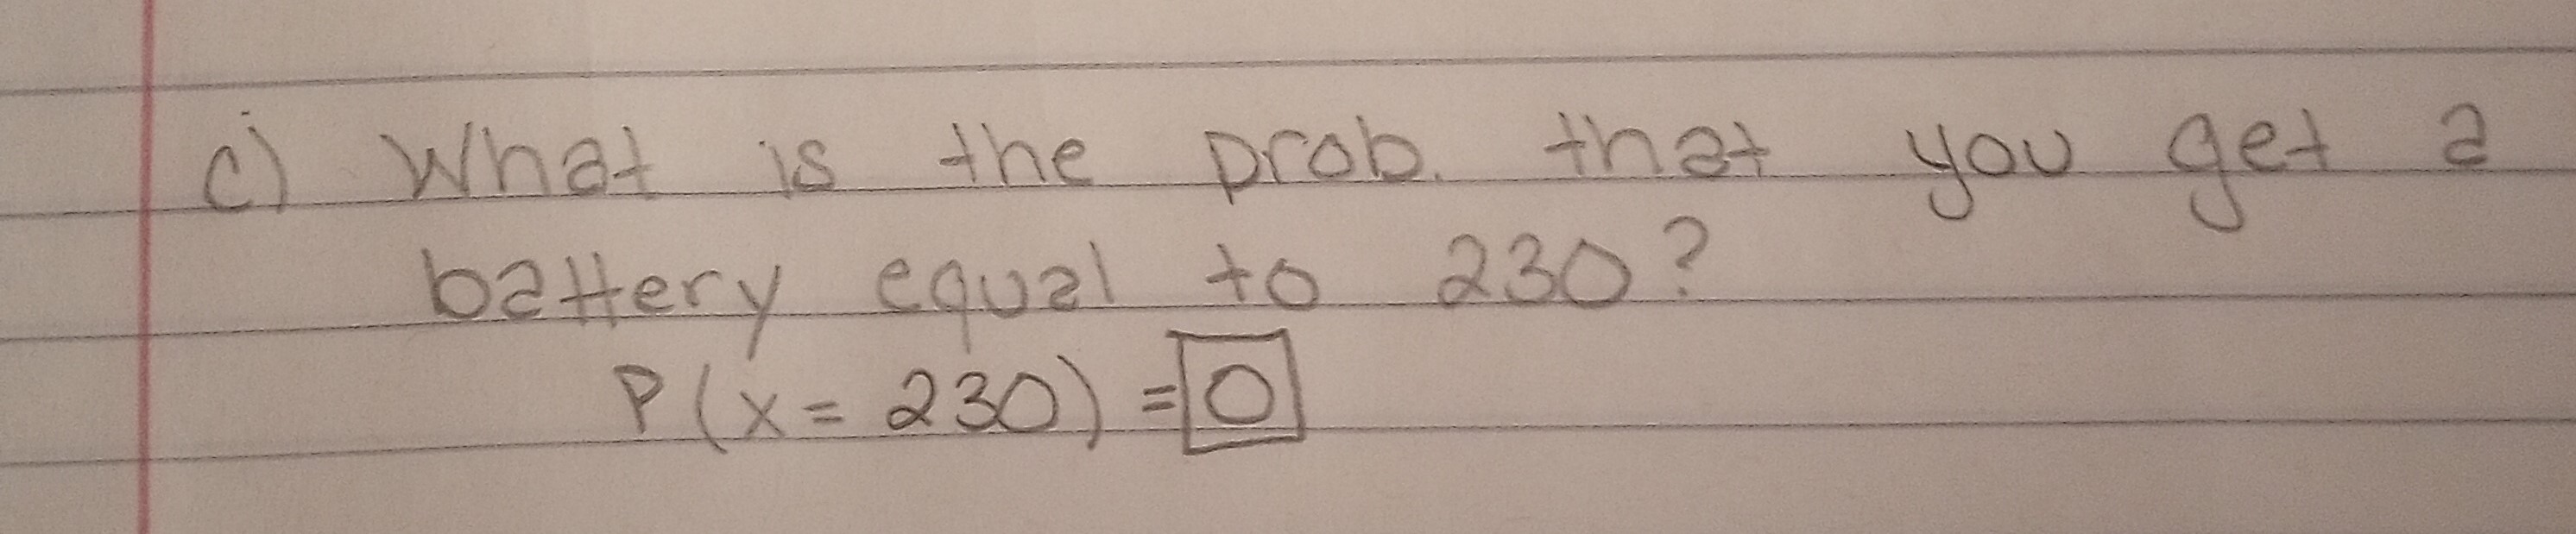